# **Introduction**

Understanding the detailed outputs of AquaCrop model is crucial for agricultural water management. However, the raw numerical data generated by this model can be challenging to interpret and gain insights from directly. This Python code enables quick visualization of the AquaCrop model timeseries outputs, specifically focusing on the temporal dynamics of key variables such as Evapotranspiration, soil moisture content over the crop growth cycle (represented by Days After Planting - DAP). Additionally, this script facilitates a clear and intuitive comparisons, making it significantly easier to discern trends, identify critical periods of water use, and ultimately enhance our understanding of the complex interactions simulated by AquaCrop.

# Saving AquaCrop Outputs on your device

It is presumed that the user already did simulation runs in the standard AquaCrop model.
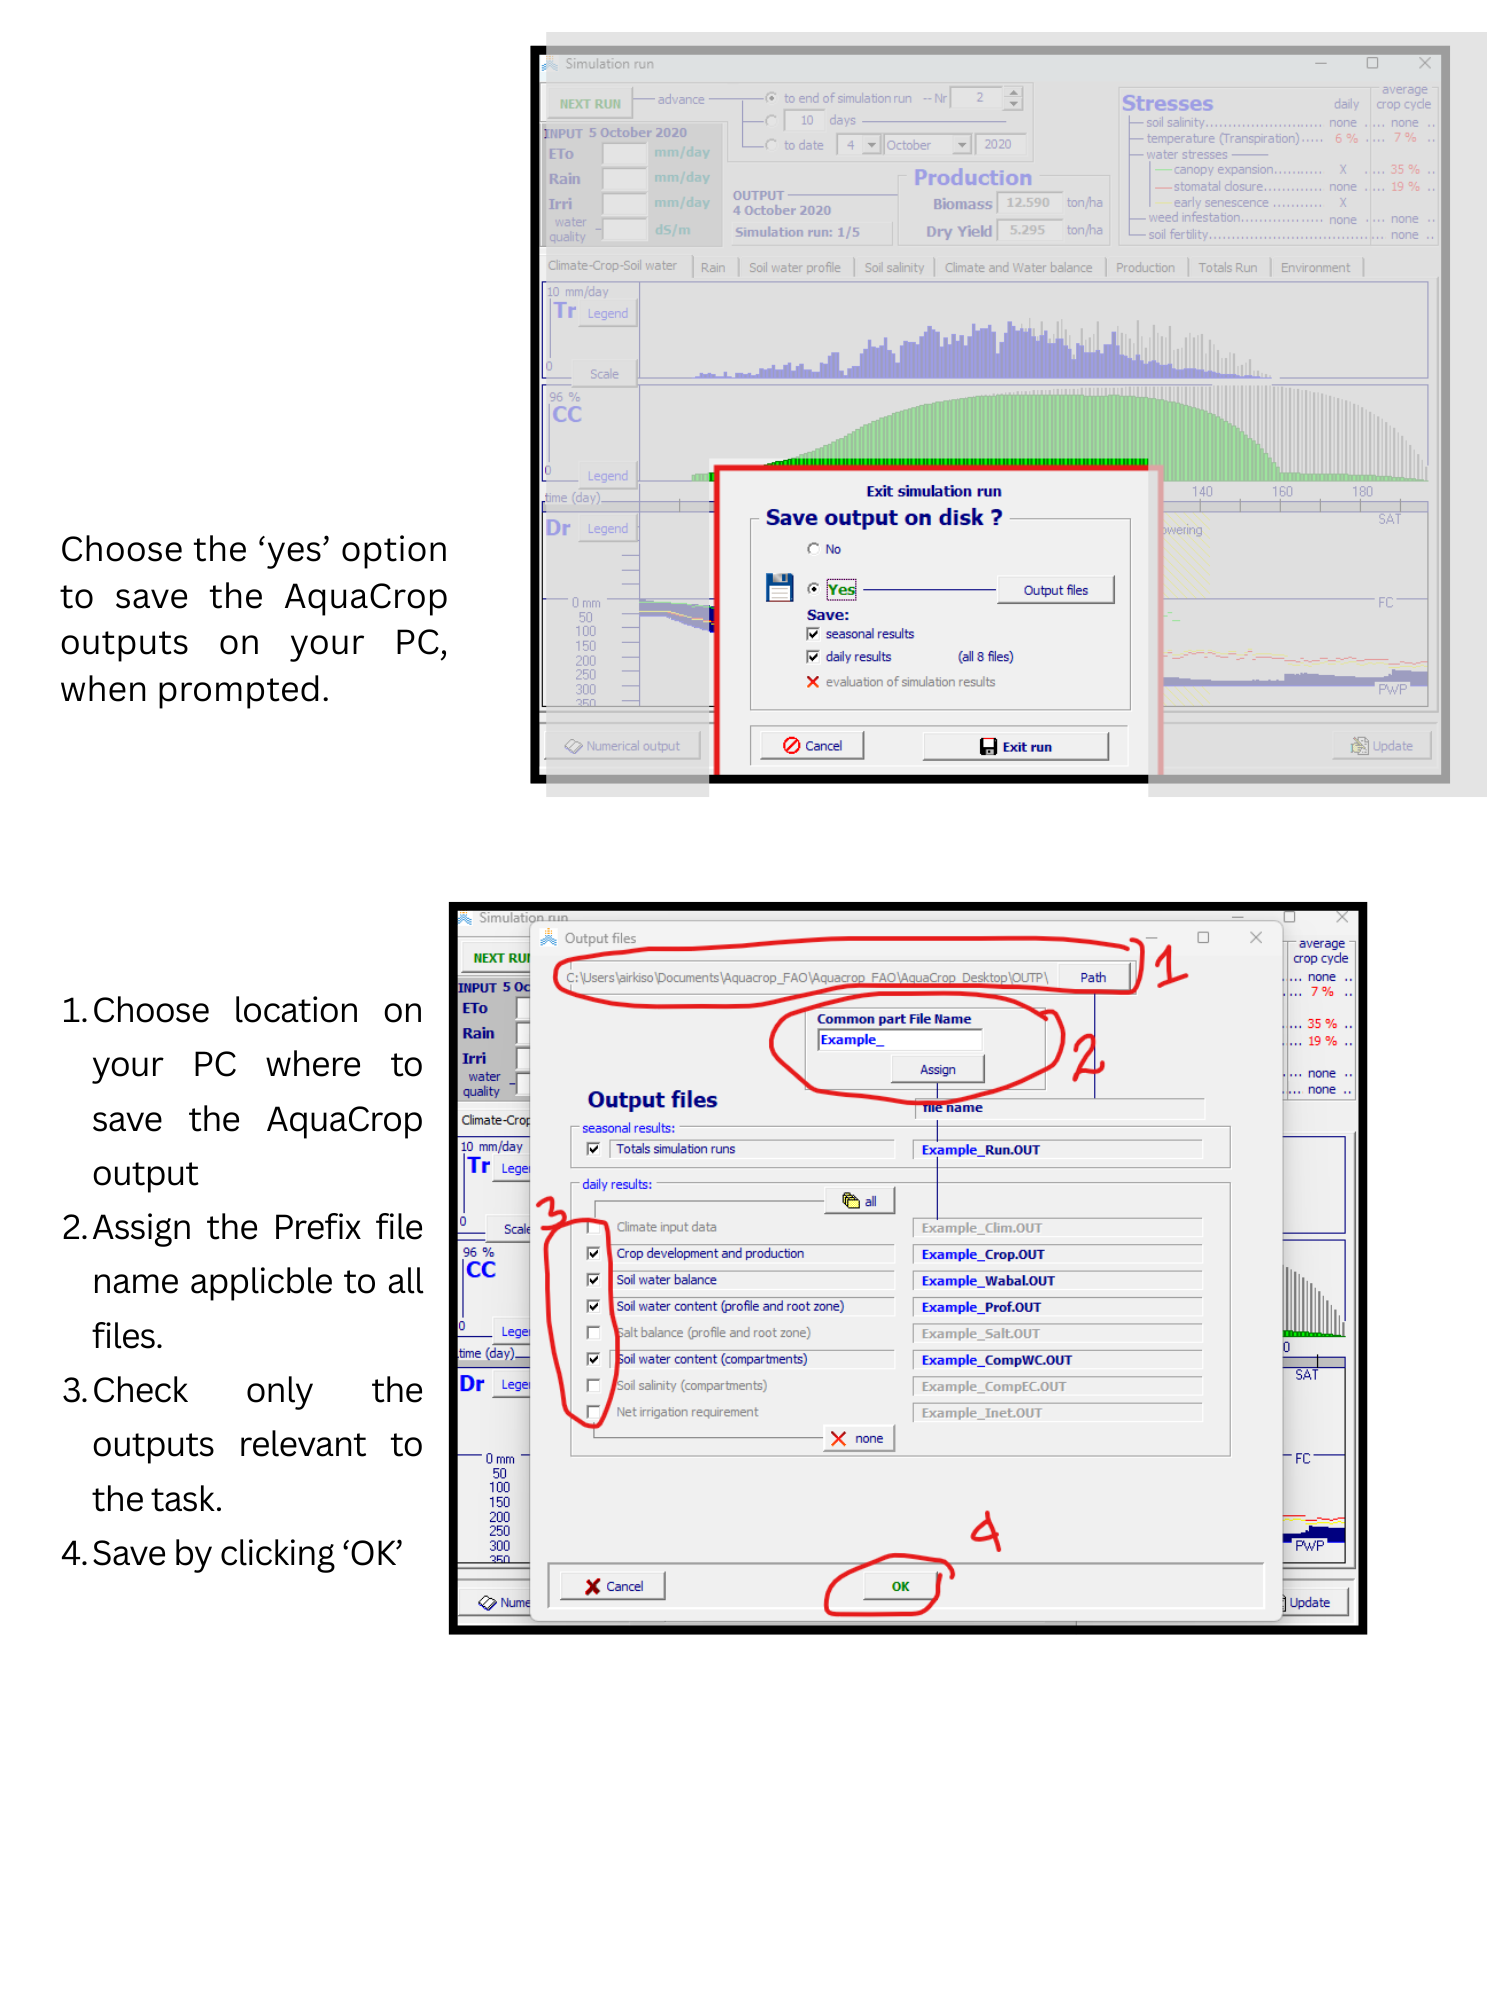

# Uploading the AquaCrop output files in google collab
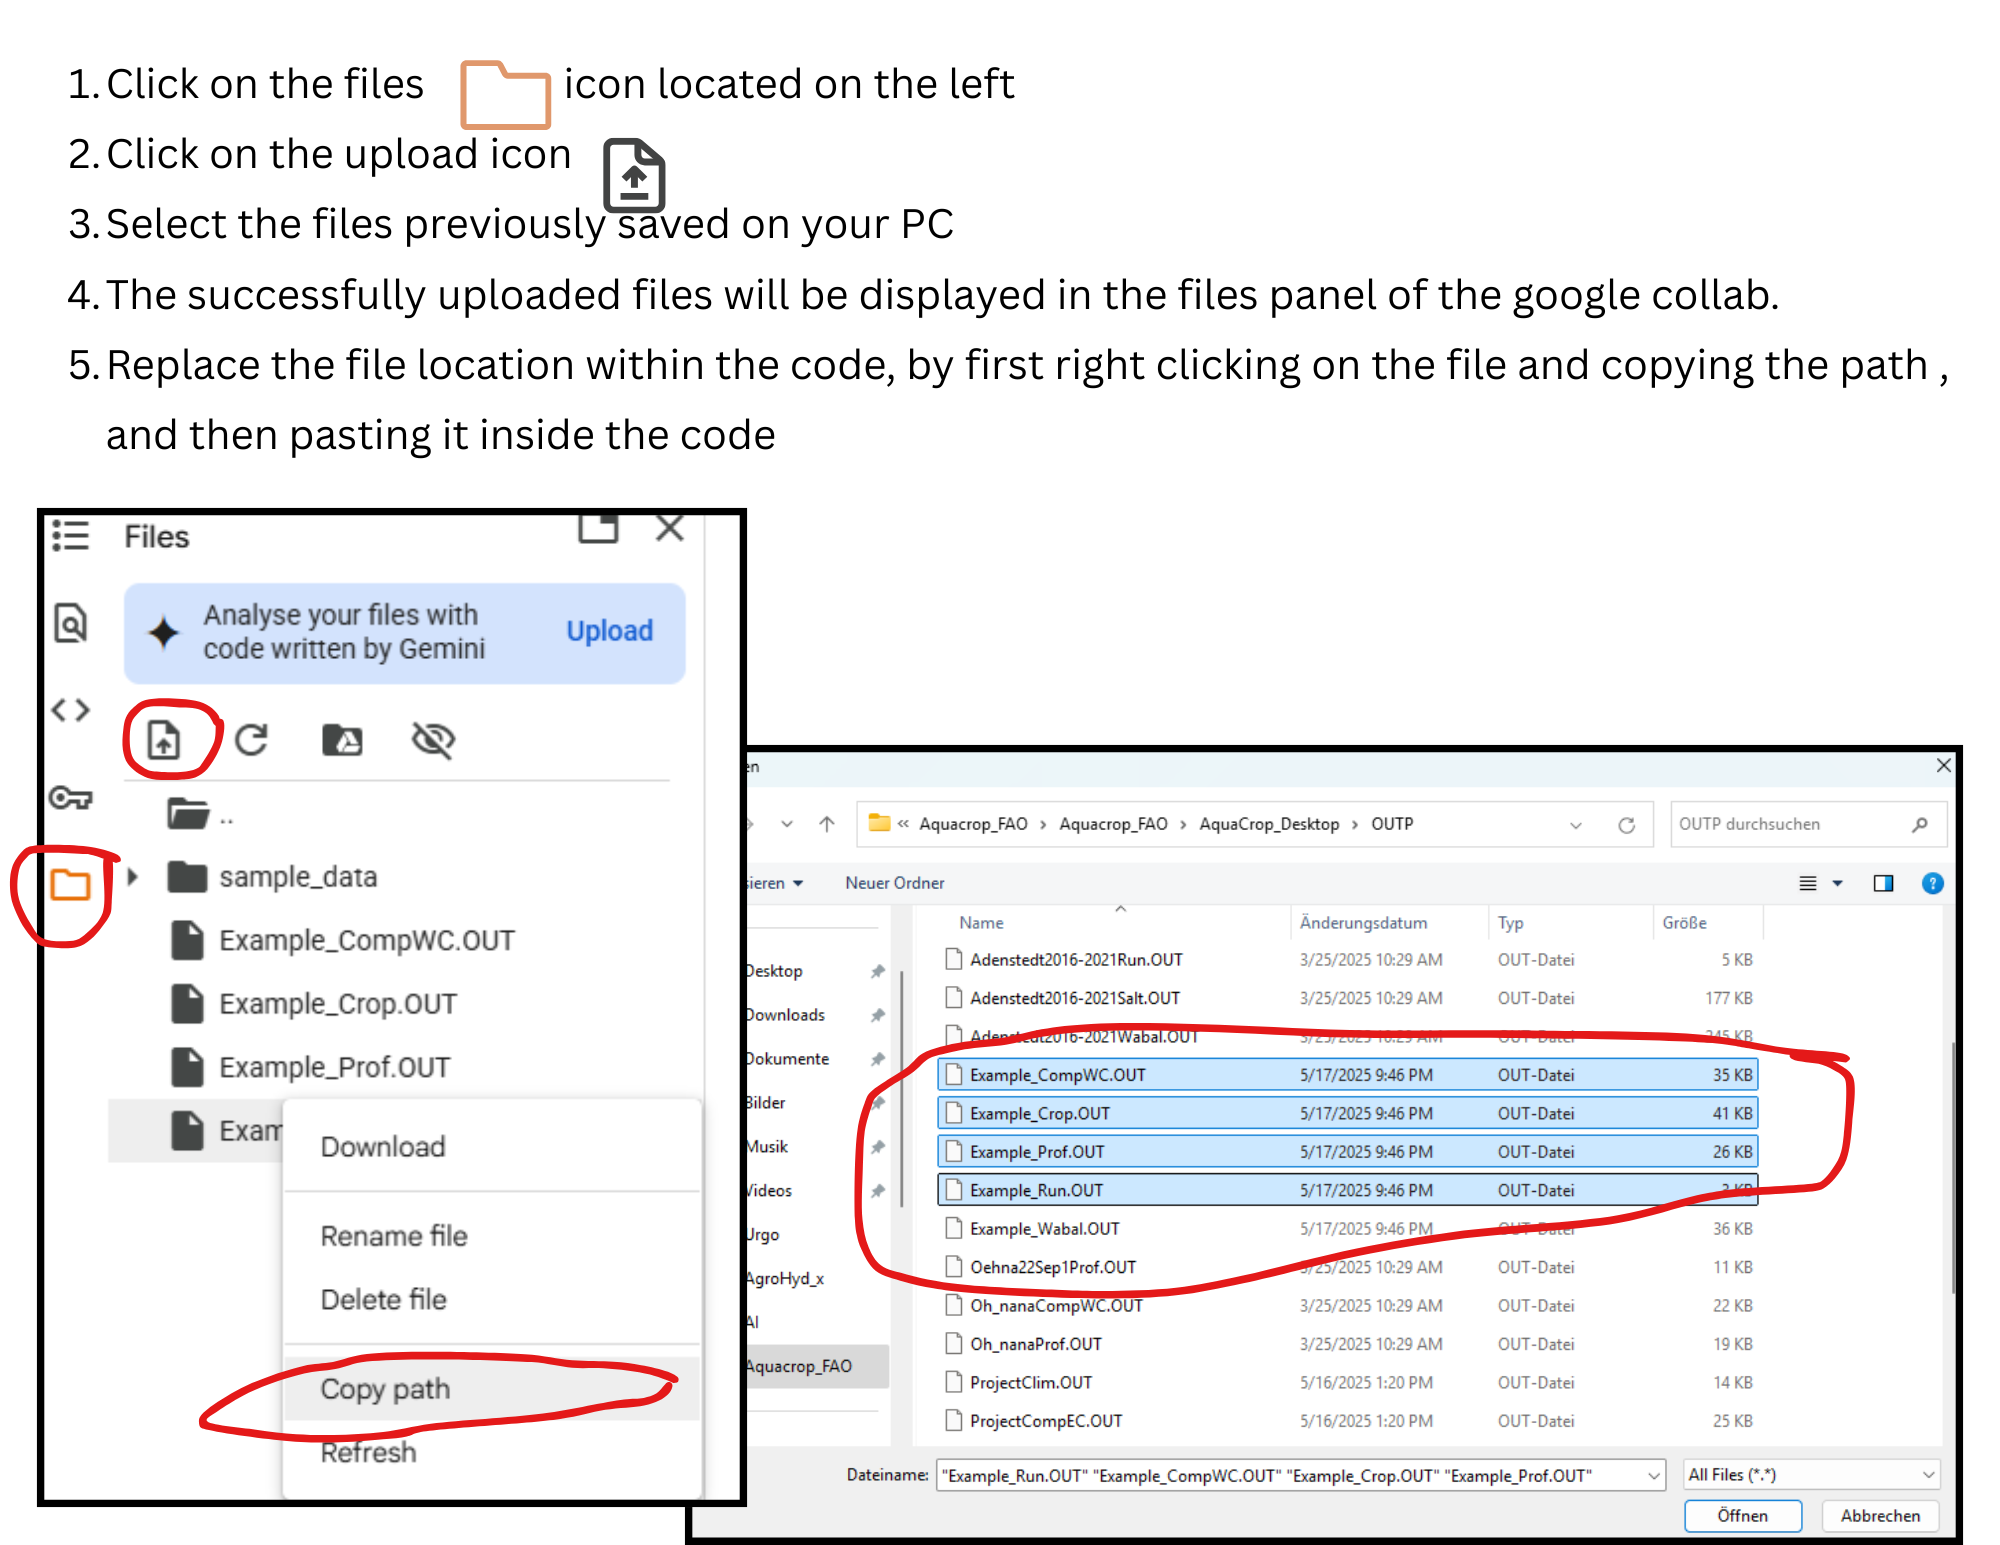

# Loading packages and function codes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
def read_aquacrop_output(file_path, columns):
    """Reads AquaCrop .OUT files and returns a combined DataFrame"""
    with open(file_path,encoding='latin-1') as file:
        lines = file.readlines()

    runs = []
    current_run = []

    for line in lines:
        if line.startswith('** Run number:'):
            if current_run:
                runs.append(current_run)
                current_run = []
        elif line.strip() and not line.startswith(('Day', 'AquaCrop', 'Soil', 'mm', 'm')) and not line.startswith('   -'):
            parts = line.split()
            if len(parts) >= 5:  # Ensure it's a data line
                current_run.append(parts)

    if current_run:
        runs.append(current_run)

    dfs = []
    for i, run_data in enumerate(runs, 1):
        if not run_data:
            continue

        # Create DataFrame and handle column count mismatch
        df = pd.DataFrame(run_data)
        col_count = min(len(columns), df.shape[1])
        df.columns = columns[:col_count]

        # Convert numeric columns
        for col in df.columns:
            if col != 'Stage':  # Stage could be text
                df[col] = pd.to_numeric(df[col], errors='coerce')

        df['Run'] = i
        dfs.append(df)

    return pd.concat(dfs) if dfs else None

def plot_variable(df, variable, plot_title=None, y_label=None, figsize=(8, 5)):#change the figure size as desired. for example try (10,7)
    """Plots a variable across all seasons"""
    if df is None:
        print("No data available to plot.")
        return

    plt.figure(figsize=figsize)

    for run_num in df['Run'].unique():
        run_data = df[df['Run'] == run_num]
        plt.plot(run_data['DAP'], run_data[variable], label=f'Season {run_num}')

    plt.xlabel('Days After Sowing (DAP)')
    plt.ylabel(y_label or f'{variable}')
    plt.title(plot_title or f'{variable} Over Time for Each Season')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_multiple_variables(df, run_num, variables, plot_title=None, y_label=None, figsize=(8, 5)):
    """Plots multiple variables for a single season"""
    if df is None:
        print("No data available to plot.")
        return

    plt.figure(figsize=figsize)
    run_data = df[df['Run'] == run_num]

    for var in variables:
        if var in run_data.columns:
            plt.plot(run_data['DAP'], run_data[var], label=var)

    plt.xlabel('Days After Sowing (DAP)')
    plt.ylabel(y_label or 'Value')
    plt.title(plot_title or f'Multiple Variables - Season {run_num}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example 1: Water balance components for single or multiple cropping seasons

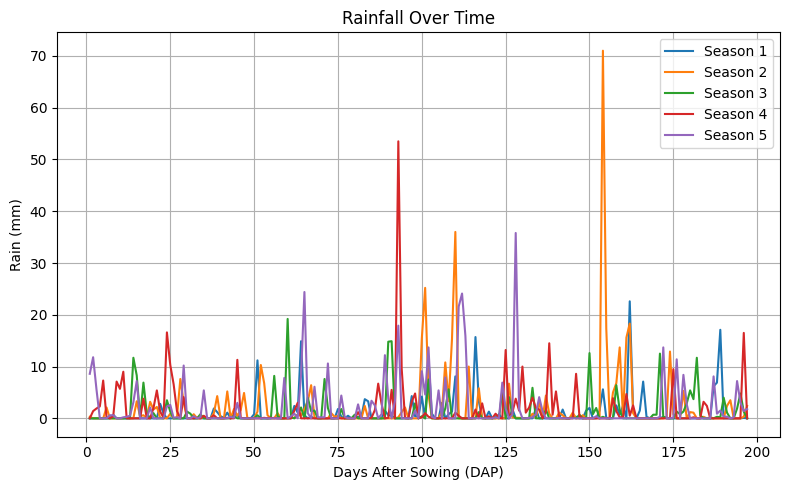

In [ ]:
wabal_columns = ['Day', 'Month', 'Year', 'DAP', 'Stage', 'WCTot', 'Rain', 'Irri', 'Surf',
                'Infilt', 'RO', 'Drain', 'CR', 'Zgwt', 'Ex', 'E', 'E/Ex', 'Trx', 'Tr',
                'Tr/Trx', 'ETx', 'ET', 'ET/ETx']
wabal_df = read_aquacrop_output('/content/Timeseriesmay16Wabal.OUT', wabal_columns) # Replace the file path ending with Wabal.OUT
plot_variable(wabal_df, 'Rain', 'Rainfall Over Time', 'Rain (mm)')

# LEGEND
# DAP          : Days after planting
# Stage        : 0: before/after planting
# Stage        : 1: emergence or transplant recovery
# Stage        : 2: vegetative stage
# Stage        : 3: flowering
# Stage        : 4: yield formation and ripening
# WCTot        : Water content in total soil profile
# Rain         : Rainfall
# Irri         : Water applied by irrigation
# Surf         : Stored water on soil surface between bunds
# Infilt       : Infiltrated water in soil profile
# RO           : Surface runoff
# Drain        : Water drained out of the soil profile
# CR           : Water moved upward by capillary rise
# Zgwt         : Depth of the groundwater table (-9.90 if absent)
# Ex           : Maximum soil evaporation
# E            : Soil evaporation
# E/Ex         : Relative soil evaporation (100 E/Ex)
# Trx          : Maximum crop transpiration
# Tr           : Total transpiration of crop and weeds
# Tr/Trx       : Relative transpiration (100 Tr/Trx)
# ETx          : Evapotranspiration maximale
# ET           : Evapotranspiration
# ET/ETx       : Evapotranspiration relative (100 ET/ETx)

# Example 2: Soil Water Content at a specific layer for single or multiple cropping seasons

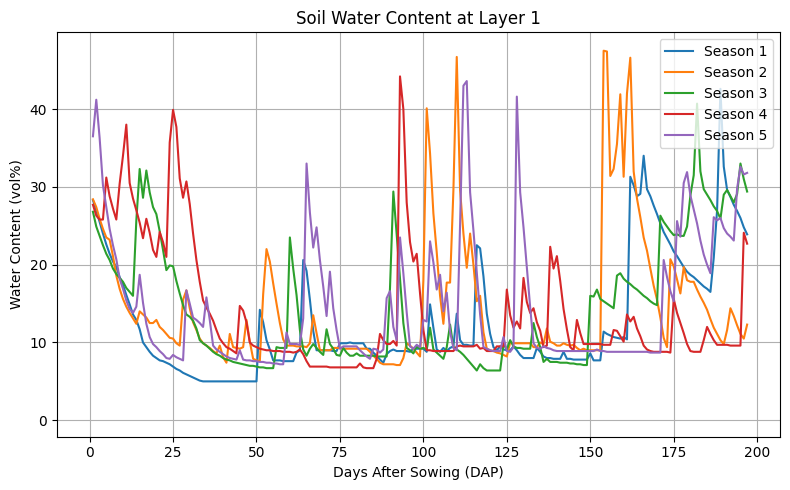

In [ ]:
wc_columns = ['Day', 'Month', 'Year', 'DAP', 'Stage', 'WC1(vol%)', 'WC2(vol%)', 'WC3(vol%)',
             'WC4(vol%)', 'WC5(vol%)', 'WC6(vol%)', 'WC7(vol%)', 'WC8(vol%)', 'WC9(vol%)',
             'WC10(vol%)', 'WC11(vol%)', 'WC12(vol%)']
wc_df = read_aquacrop_output('/content/Timeseriesmay16CompWC.OUT', wc_columns)# Replace the file path ending with CompWC.OUT
plot_variable(wc_df, 'WC1(vol%)', 'Soil Water Content at Layer 1', 'Water Content (vol%)')

##  LEGEND
# DAP          : Days after planting
# Stage        : 0: before/after planting
# Stage        : 1: emergence or transplant recovery
# Stage        : 2: vegetative stage
# Stage        : 3: flowering
# Stage        : 4: yield formation and ripening
# WC1(vol%) - WC12(vol%) : Water Content (WC) at different soil layers (1,2,3,4,5.....)

# Example 4 - Soil water content comparison at multiple soil layers per one cropping season

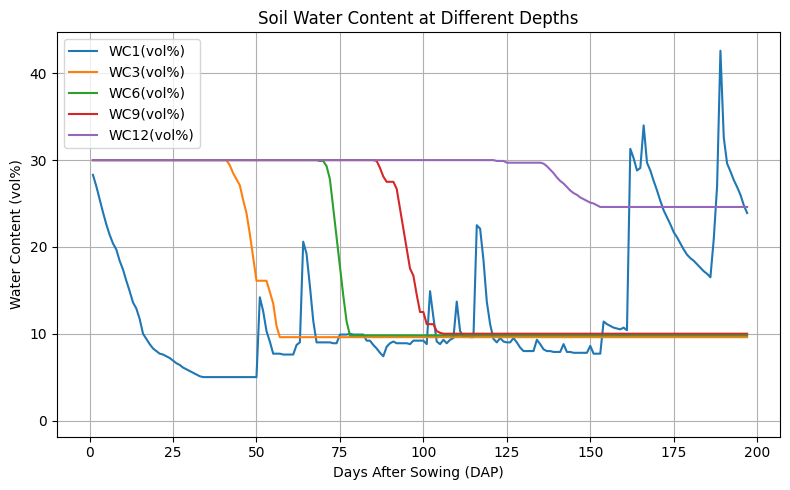

In [ ]:

soil_layers = ['WC1(vol%)', 'WC3(vol%)', 'WC6(vol%)', 'WC9(vol%)', 'WC12(vol%)']
plot_multiple_variables(wc_df, 1, soil_layers, 'Soil Water Content at Different Depths', 'Water Content (vol%)')

# Example 5: Crop growth outputs for single or multiple seasons

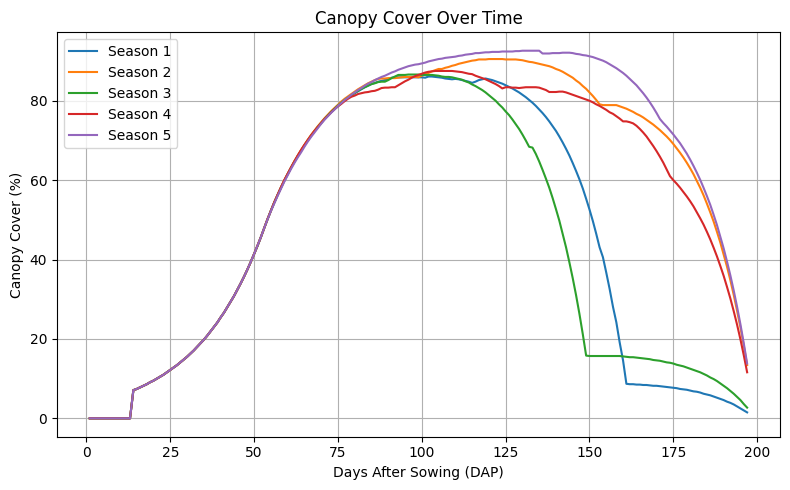

In [ ]:

crop_columns = ['Day', 'Month', 'Year', 'DAP', 'Stage', 'GD', 'Z', 'StExp', 'StSto', 'StSen',
               'StSalt', 'StWeed', 'CC', 'CCw', 'StTr', 'Kc(Tr)', 'Trx', 'Tr', 'TrW', 'Tr/Trx',
               'WP', 'Biomass', 'HI', 'YieldPart', 'Brelative', 'WPet']
crop_df = read_aquacrop_output('/content/Timeseriesmay16Crop.OUT', crop_columns)# Replace the file path ending with Crop.OUT
plot_variable(crop_df, 'CC', 'Canopy Cover Over Time', 'Canopy Cover (%)')

# Legend

# DAP          : Days after planting
# Stage        : 0: before/after planting
# Stage        : 1: emergence or transplant recovery
# Stage        : 2: vegetative stage
# Stage        : 3: flowering
# Stage        : 4: yield formation and ripening
# GD           : Growing degrees
# Z            : Effective rooting depth
# StExp        : Percent water stress reducing leaf expansion
# StSto        : Percent water stress inducing stomatal closure
# StSen        : Percent water stress triggering early canopy senescence
# StSalt       : Percent salinity stress
# StWeed       : Relative cover of weeds
# CC           : Green total Canopy Cover of crop and weeds
# CCw          : Green crop Canopy Cover in weed infested field
# StTr         : Percent temperature stress affecting crop transpiration
# Kc(Tr)       : Crop coefficient for transpiration
# Trx          : Maximum total transpiration of crop and weeds
# Tr           : Total transpiration of crop and weeds
# TrW          : Crop transpiration in weed infested field
# Tr/Trx       : Relative total transpiration of crop and weeds (100 Tr/Trx)
# WP           : Crop water productivity adjusted for CO2, soil fertility and products synthesized
# Biomass      : Cumulative crop biomass
# HI           : Harvest Index adjusted for failure of pollination, inadequate photosynthesis and water stress
# Yield Part   : Crop yield (HI x Biomass)
# Brelative    : Relative biomass (Reference: no water, no soil fertility, no soil salinity stress, no weed infestation)
# WPet         : ET Water productivity for yield part (kg yield produced per m3 water evapotranspired)

# Example 6: Water content in total soil profile for single or multiple seasons

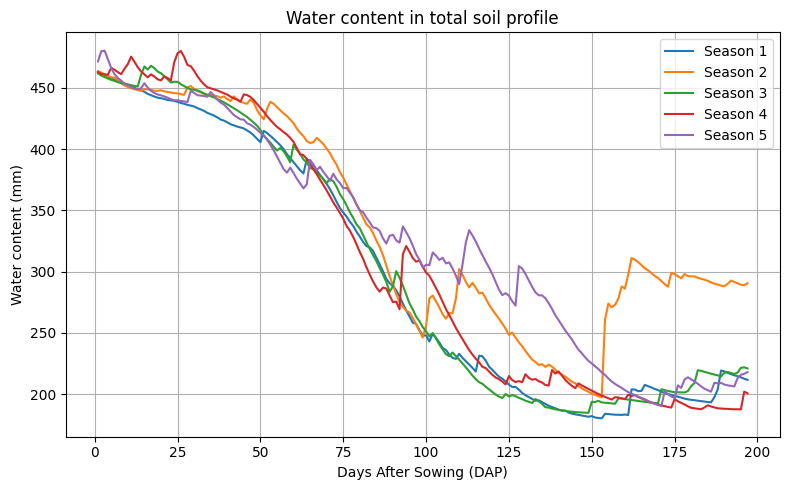

In [ ]:

prof_columns = ['Day', 'Month', 'Year', 'DAP', 'Stage', 'WCTot', 'Wr(Zx)',
           'Z', 'Wr', 'Wr(SAT)', 'Wr(FC)', 'Wr(exp)', 'Wr(sto)',
           'Wr(sen)', 'Wr(PWP)']
prof_df = read_aquacrop_output('/content/Timeseriesmay16Prof.OUT', prof_columns) # Replace the file path ending with Prof.OUT
plot_variable(prof_df, 'WCTot', 'Water content in total soil profile', 'Water content (mm)')

# Legend

# DAP          : Days after planting
# Stage        : 0: before/after planting
# Stage        : 1: emergence or transplant recovery
# Stage        : 2: vegetative stage
# Stage        : 3: flowering
# Stage        : 4: yield formation and ripening
# WCTot        : Water content in total soil profile (layer: 0.00 - 1.55 m)
# Wr(Zx)       : Water content in maximum effective root zone (Zx = 1.50 m)
# Z            : Effective rooting depth
# Wr           : Water content in effective root zone
# Wr(Sat)      : Water content in effective root zone if saturated
# Wr(FC)       : Water content in effective root zone at field capacity
# Wr(exp)      : Water content in effective root zone at upper threshold for leaf expansion
# Wr(sto)      : Water content in effective root zone at upper threshold for stomatal closure
# Wr(sen)      : Water content in effective root zone at upper threshold for early canopy senescence
# Wr(PWP)      : Water content in effective root zone at permanent wilting point